In [3]:
# En primer lugar, importamos las librerías necesarias:
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Reviews de usuarios:

Las reviews de los usuarios de Yelp se encuentran alojadas en un archivo JSON de gran tamaño, por lo que se realiza su apertura en partes o "chunks" para luego cargar en 2 diferentes dataframes:

In [3]:
# Se determina la cantidad de datos por porción:
chunk_size = 50000
# Se carga la info en un dataframe de pandas 
chunks = pd.read_json("Datasets/review-001.json", lines=True, chunksize=chunk_size)

# Se crea una lista vacía donde se almacenarán los distintos dataframes
dfs = []
for chunk in chunks:
    dfs.append(chunk)

# Se define el punto de corte para separar al dataframe en 2:
corte = int(len(dfs)/2)

### Parte 1

In [ ]:
# Se define la primera mitad del dataframe:
dfs1 = dfs[:corte]
df_reviews1 = pd.concat(dfs1, axis=0, ignore_index=True)

In [7]:
# Se controla la info general del dataset:
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500000 entries, 0 to 3499999
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 240.3+ MB


In [8]:
# Se controla la cantidad de valores nulos:
df_reviews1.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [9]:
# Se controla la cantidad de valores duplicados:
df_reviews1.duplicated().sum()

0

Se filtran las reviews de los "busines_id" de restaurantes latinoamericanos:

In [4]:
# Se define una lista con todos los id de restaurantes latinoamericanos:
latin_business_id = ['du_yelFmWOZDEyIAE-jdsQ', 'k9A4tAmei12tLprkrNPkcg',
       'ERl6OCSEIFBOqfjai_jIUg', 'VaPj2Mpu0IpsUoisyTCAUg',
       'Qi-A4ZgcEuSnq_8Fpfo_3Q', 'otQS34_MymijPTdNBoBdCw',
       'IwqFmo-RJs15WvA8PVHFnA', 'JhwFBmMtZUejWLuEQfGoTg',
       'lOX7LiFDr4FEUZX5AWjXag', 'IKXaAODca0KYqr8Fo4sgjw',
       'WkNJ3FnK5WVW3thVUe-WSw', 'if2ZvtLUOdn6EFeWjZV6tg',
       'JUlsvVAvZvGHWFfkKm0nlg', 'GK-IbObdUilYtlfgqnQ1Kw',
       'necnuacmR2jYCiEova3s-Q', 'E2RHAkI4wasggwV9rYb-Fw',
       'qDgR8XtZ0-P3DCDF9YccPw', 'twuh803Q03U9X1YGnJgilg',
       '9vmnXOpK8y9xFSSSlgnZsA', 'GtIbWHFiCuO3h66XqkwnAA',
       'OBHirkn1QCd7rsYHYtSdwQ', '4bIWYWFu2OobvS2gz4Lx0g',
       '8XSW4uA85WqHdQlRirWkQg', 'hT5UJB4LmoB6MTeDZIi1BA',
       't6gPcWX0CGkMR0AM1lCazw', '-xUj6GtnPLmf5zwHz7ZILg',
       'WDOjluN4QeTnjt4E6DmIYQ', '_jRB9wKomaO1W3tfA1sX_Q',
       'TYCVhhIkfIzi5dJWdBLhoQ', 'wGYQmcyHm-zyX6GO9u5nlg',
       'BprJtcxm1P7VP6viiTOanw', 'nvhyXE3flQbh6Fw8vYaQRQ',
       'Nz5eRRkTK1RGEjUlJojRQQ', 'plYw0lBpAIBdwqH8FY1H_A',
       '1wKbk-FtJBBidd1k8s09DA', 'DSrRt2Fcrj0bQv8SC3P-3w',
       'yQK-MSBijno2iMfUZ2JjzQ', 'vcrTtmz-VZTABbU1bGST4Q',
       '_0u1MwrTyXx7bLWuVW1XwQ', 'KmZuIc9o_PL2BW8j_7gy7w',
       '2jbADqg-NvcVjjdxdEetrg', 'GufJXz393fnNpQi_ba-YNA',
       'A6mvg7BufgYX-ghyULRScg', 'VBJenKqcBasewkS7PoLOWA',
       '7zJTwOt2mZP3zjaQI1ccWg', 'dyZGdkXEn6TMguQC8-fveg',
       'dreCjzKBp6ZEJTwpL3pQOQ', 'hfQEzgd-vtUQNJukauvQ5A',
       'Jmk_N22L1iQ6-EZIlexqag', 'MJgHI9yuGej00bemw0R_uw',
       'XIR6VBtBm5L9CzNqzEPKng', 'eT8pP1ND98zYLST5zhZtEQ',
       'JTyjDMwU01xi0iPIYgCSCw', 'LnN7LbbqFK1OvFjbkhUjaQ',
       '_tvR2q9UJmFAxf7FE83eaw', 'n3KL3EL2CTSD4ol937sTGg',
       'mh_WoveKnqCzIETmZIn7Sg', 'Nm8N8GU7pYg2rnV_GlwrzQ',
       '3awWfOPccIIZi5G9zedZew', 'mJey7zMvlXHCLPHUgo_pwg',
       'Miy9w9lKGL_AzqIMkSvB0g', 'DqVpNtgFCP47n6frh-LREA',
       '4u_FN69s_HeGCXYupnIscw', 'KuVtxfIJu4qRscngMsVcxg',
       'UO-QrBeJYDiIfGm5oZgL2g', 'gN3VmmeNlcGTpuJfowWV9A',
       '-t29rrypP0eQdTeQ3YErdg', 'WeDn7iD1ckcEg7YttkduWg',
       '9fs3zBWKZBjosH2rSVvo-A', 'cyF4vtmQ4LhsYCHSARzk5Q',
       '-nEsM53i_wmt9wpSlQm1Rg', 'lZbimwxtW5JPB6biT7_q3w',
       '_uDhUdcNBtgiOXPGPWunoQ', 'JCNd5pF0GvSARbppJlrscA',
       'keNKoW2SDNtFdeAGXPqwig', 'qIn57tACk3lBmTNOpZoT8w',
       'JLV6DlY2_86blXAgQ8LG9w', 'rIYH73o6dwNimMr1WFF9ww',
       '_HO5ubZyfVKVWytSDZy1tA', 'cSi9yz7HwQwigsKF374Paw',
       '-ovvV-tXLQdXyYgdCBZm7Q', 'ZBfagfCUXYhe4q9sD7hpjQ',
       'NIqFlHurHm0cj6QXczYbEQ', 'OxXMZfaRZc7SJnjMBkO1ww',
       'ccPRPHBzUubwe65VG14ioA', 'm4kvY0viCwxqRtgOycnKVQ',
       'qmsdbXMG6DCNXEEZJz4d5g', 'H14Kenpp7-Z5IKrLqGGv3g',
       'dp4HDuSnR5MvlgJ4mR2m3Q', 'BJtrQ0CBSklwMzkUV-VdLg',
       'IG2KelKEHCwybPl98frdgQ', 'XVI5rfr_1I-NY7JwgSj1yg',
       'qRgeV1CMZawRblc2qjHo_g', 'eTVtHkrdoh8plErbmRhTfw',
       'abmP4I_2mlXu4uM3Gmfgbw', 'VmxGFqtplC3yIOClQ3Tulg',
       'VogFhW9pRLuT6dDjLA1BcQ', 'EWFkVvEerJOvoGt8dSJZ7w',
       'Y0rpC4XGwRmnlDr1TEJ3Hw', '0-CQlqMMOrwMhy4EgW4tfw',
       'qnXHKdDFaPZ3PwygllYk8w', 'fix5sbGFzHUVDXpzhHctIA',
       '9w-LZEkP1hf363G-OYvKDg', 'mRKxPMk9jHgCj07MwAMUzw',
       'oIsqZJPVOc53GUiUgQUvsg', '_JWS3tE7h-8-CXNGYD0ZYA',
       'ejYVhqT_e-8JX276XG0ozw', 'QATSKHcEMHjifyIb6aIALg',
       'E7xjXq3F5Yqmhbo8ye_csw', 'LporxuZB4AEg4mhLYhfpDw',
       'Tj_NfMHfabdjndcJ3MZY6A', 'O-J8l_KT4lulqnK4DIIj3w',
       'IIudBP8_Rg2pPgUQwNOgFQ', 'rU139D5Zl5928RYoXYSURA',
       'E01_x43vPxeOQ9MFbhSKDQ', 'wIXYreqGaO5AEVjNQulbKQ',
       'oVygpPlGIKyPltoOjusqtw', 'GRmG8w-guTT3Wp-MoRSQpA',
       'Rt4KE1qP7czqcgnqLRspDg']

# Se filtran las reviews:
yelp_latin_rev = df_reviews1[df_reviews1["business_id"].isin(latin_business_id)]
yelp_latin_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
368,jlvaJo1I56NrZ1Q1CUuuRw,17jzGkFYCvB5Q0fjJEzVAA,otQS34_MymijPTdNBoBdCw,4,0,0,0,I was told this place is a must for a Sonoran ...,2017-06-17 17:17:29
485,yx1IGiMSFDeuosuoRE1gpQ,EYg-VaZlk13-blZxyohLDg,JUlsvVAvZvGHWFfkKm0nlg,3,0,0,0,We went to this restaurant after running in th...,2010-11-23 13:45:24
512,7ouwt0DtmhHxjQpDwDkN7Q,dme9K6sQrgpojAay5r8IAA,JUlsvVAvZvGHWFfkKm0nlg,3,2,0,0,"I loves me some seitan, and that's why I keep ...",2010-03-12 23:41:38
727,7ym4hsISxBUwa3ugL7cL9Q,SEPSy_TUicGdTg-_72aOmQ,IwqFmo-RJs15WvA8PVHFnA,5,3,0,1,This place just opened up near rivers edge apa...,2018-05-19 15:04:56


In [5]:
# Se controla la info general del dataset
yelp_latin_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7187 entries, 14 to 3499482
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    7187 non-null   object        
 1   user_id      7187 non-null   object        
 2   business_id  7187 non-null   object        
 3   stars        7187 non-null   int64         
 4   useful       7187 non-null   int64         
 5   funny        7187 non-null   int64         
 6   cool         7187 non-null   int64         
 7   text         7187 non-null   object        
 8   date         7187 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 561.5+ KB


Se eliminan las columnas que no aportan al análisis y se resetea el índice:

In [6]:
yelp_latin_rev = yelp_latin_rev.drop(columns=["useful", "funny", "cool"]).reset_index(drop=True)

### Parte 2

In [5]:
# Se define la segunda mitad del dataframe
dfs2 = dfs[corte:]
df_reviews2 = pd.concat(dfs2, axis=0, ignore_index=True)

In [3]:
# Se controla la info general del dataset:
df_reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490280 entries, 0 to 3490279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 239.7+ MB


In [11]:
# Se controla la cantidad de valores nulos:
df_reviews2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [13]:
# Se controla la cantidad de valores duplicados:
df_reviews2.duplicated().sum()

0

Se filtran las reviews de los "busines_id" de restaurantes latinoamericanos:

In [4]:
# Se define una lista con todos los id de restaurantes latinoamericanos:
latin_business_id = ['du_yelFmWOZDEyIAE-jdsQ', 'k9A4tAmei12tLprkrNPkcg',
       'ERl6OCSEIFBOqfjai_jIUg', 'VaPj2Mpu0IpsUoisyTCAUg',
       'Qi-A4ZgcEuSnq_8Fpfo_3Q', 'otQS34_MymijPTdNBoBdCw',
       'IwqFmo-RJs15WvA8PVHFnA', 'JhwFBmMtZUejWLuEQfGoTg',
       'lOX7LiFDr4FEUZX5AWjXag', 'IKXaAODca0KYqr8Fo4sgjw',
       'WkNJ3FnK5WVW3thVUe-WSw', 'if2ZvtLUOdn6EFeWjZV6tg',
       'JUlsvVAvZvGHWFfkKm0nlg', 'GK-IbObdUilYtlfgqnQ1Kw',
       'necnuacmR2jYCiEova3s-Q', 'E2RHAkI4wasggwV9rYb-Fw',
       'qDgR8XtZ0-P3DCDF9YccPw', 'twuh803Q03U9X1YGnJgilg',
       '9vmnXOpK8y9xFSSSlgnZsA', 'GtIbWHFiCuO3h66XqkwnAA',
       'OBHirkn1QCd7rsYHYtSdwQ', '4bIWYWFu2OobvS2gz4Lx0g',
       '8XSW4uA85WqHdQlRirWkQg', 'hT5UJB4LmoB6MTeDZIi1BA',
       't6gPcWX0CGkMR0AM1lCazw', '-xUj6GtnPLmf5zwHz7ZILg',
       'WDOjluN4QeTnjt4E6DmIYQ', '_jRB9wKomaO1W3tfA1sX_Q',
       'TYCVhhIkfIzi5dJWdBLhoQ', 'wGYQmcyHm-zyX6GO9u5nlg',
       'BprJtcxm1P7VP6viiTOanw', 'nvhyXE3flQbh6Fw8vYaQRQ',
       'Nz5eRRkTK1RGEjUlJojRQQ', 'plYw0lBpAIBdwqH8FY1H_A',
       '1wKbk-FtJBBidd1k8s09DA', 'DSrRt2Fcrj0bQv8SC3P-3w',
       'yQK-MSBijno2iMfUZ2JjzQ', 'vcrTtmz-VZTABbU1bGST4Q',
       '_0u1MwrTyXx7bLWuVW1XwQ', 'KmZuIc9o_PL2BW8j_7gy7w',
       '2jbADqg-NvcVjjdxdEetrg', 'GufJXz393fnNpQi_ba-YNA',
       'A6mvg7BufgYX-ghyULRScg', 'VBJenKqcBasewkS7PoLOWA',
       '7zJTwOt2mZP3zjaQI1ccWg', 'dyZGdkXEn6TMguQC8-fveg',
       'dreCjzKBp6ZEJTwpL3pQOQ', 'hfQEzgd-vtUQNJukauvQ5A',
       'Jmk_N22L1iQ6-EZIlexqag', 'MJgHI9yuGej00bemw0R_uw',
       'XIR6VBtBm5L9CzNqzEPKng', 'eT8pP1ND98zYLST5zhZtEQ',
       'JTyjDMwU01xi0iPIYgCSCw', 'LnN7LbbqFK1OvFjbkhUjaQ',
       '_tvR2q9UJmFAxf7FE83eaw', 'n3KL3EL2CTSD4ol937sTGg',
       'mh_WoveKnqCzIETmZIn7Sg', 'Nm8N8GU7pYg2rnV_GlwrzQ',
       '3awWfOPccIIZi5G9zedZew', 'mJey7zMvlXHCLPHUgo_pwg',
       'Miy9w9lKGL_AzqIMkSvB0g', 'DqVpNtgFCP47n6frh-LREA',
       '4u_FN69s_HeGCXYupnIscw', 'KuVtxfIJu4qRscngMsVcxg',
       'UO-QrBeJYDiIfGm5oZgL2g', 'gN3VmmeNlcGTpuJfowWV9A',
       '-t29rrypP0eQdTeQ3YErdg', 'WeDn7iD1ckcEg7YttkduWg',
       '9fs3zBWKZBjosH2rSVvo-A', 'cyF4vtmQ4LhsYCHSARzk5Q',
       '-nEsM53i_wmt9wpSlQm1Rg', 'lZbimwxtW5JPB6biT7_q3w',
       '_uDhUdcNBtgiOXPGPWunoQ', 'JCNd5pF0GvSARbppJlrscA',
       'keNKoW2SDNtFdeAGXPqwig', 'qIn57tACk3lBmTNOpZoT8w',
       'JLV6DlY2_86blXAgQ8LG9w', 'rIYH73o6dwNimMr1WFF9ww',
       '_HO5ubZyfVKVWytSDZy1tA', 'cSi9yz7HwQwigsKF374Paw',
       '-ovvV-tXLQdXyYgdCBZm7Q', 'ZBfagfCUXYhe4q9sD7hpjQ',
       'NIqFlHurHm0cj6QXczYbEQ', 'OxXMZfaRZc7SJnjMBkO1ww',
       'ccPRPHBzUubwe65VG14ioA', 'm4kvY0viCwxqRtgOycnKVQ',
       'qmsdbXMG6DCNXEEZJz4d5g', 'H14Kenpp7-Z5IKrLqGGv3g',
       'dp4HDuSnR5MvlgJ4mR2m3Q', 'BJtrQ0CBSklwMzkUV-VdLg',
       'IG2KelKEHCwybPl98frdgQ', 'XVI5rfr_1I-NY7JwgSj1yg',
       'qRgeV1CMZawRblc2qjHo_g', 'eTVtHkrdoh8plErbmRhTfw',
       'abmP4I_2mlXu4uM3Gmfgbw', 'VmxGFqtplC3yIOClQ3Tulg',
       'VogFhW9pRLuT6dDjLA1BcQ', 'EWFkVvEerJOvoGt8dSJZ7w',
       'Y0rpC4XGwRmnlDr1TEJ3Hw', '0-CQlqMMOrwMhy4EgW4tfw',
       'qnXHKdDFaPZ3PwygllYk8w', 'fix5sbGFzHUVDXpzhHctIA',
       '9w-LZEkP1hf363G-OYvKDg', 'mRKxPMk9jHgCj07MwAMUzw',
       'oIsqZJPVOc53GUiUgQUvsg', '_JWS3tE7h-8-CXNGYD0ZYA',
       'ejYVhqT_e-8JX276XG0ozw', 'QATSKHcEMHjifyIb6aIALg',
       'E7xjXq3F5Yqmhbo8ye_csw', 'LporxuZB4AEg4mhLYhfpDw',
       'Tj_NfMHfabdjndcJ3MZY6A', 'O-J8l_KT4lulqnK4DIIj3w',
       'IIudBP8_Rg2pPgUQwNOgFQ', 'rU139D5Zl5928RYoXYSURA',
       'E01_x43vPxeOQ9MFbhSKDQ', 'wIXYreqGaO5AEVjNQulbKQ',
       'oVygpPlGIKyPltoOjusqtw', 'GRmG8w-guTT3Wp-MoRSQpA',
       'Rt4KE1qP7czqcgnqLRspDg']

# Se filtran las reviews:
yelp_latin_rev2 = df_reviews2[df_reviews2["business_id"].isin(latin_business_id)]
yelp_latin_rev2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1099,6BxUrLqFIzJ7NRMzuWR44g,y2Tmb8lZvhHM4b7vifq_bQ,WeDn7iD1ckcEg7YttkduWg,5,0,0,0,My husband is Mexican and I have lived in Mexi...,2018-04-28 17:39:37
1807,2i8QNvQ-8JeluYe2W8ky0Q,KI4Qksd3x7eAJZp1OKZXfA,JLV6DlY2_86blXAgQ8LG9w,2,2,1,0,Food is still good but absolutely unacceptable...,2013-10-05 15:41:14
2158,RPT8s6R-iOv0LbX2fjRNNA,K-1mVlbCCJ0YV-7ENXuIeA,9fs3zBWKZBjosH2rSVvo-A,1,0,0,0,Have had the last 5 pick up orders messed up p...,2017-01-28 00:33:13
2197,ZhNk7Cx0ch3wzJjS1JGpiA,FqURaaZ_hEzr15YfJEfA8g,NIqFlHurHm0cj6QXczYbEQ,4,0,0,0,Best Mexican food in Carpinteria. They have ve...,2014-06-12 00:02:05
3221,arVBC-ll4TobolWT42e_KQ,yOA0VxjQ7wTqMwUffQKsgQ,NIqFlHurHm0cj6QXczYbEQ,2,0,0,0,Read the reviews before i tried this place. Sa...,2016-07-15 02:51:02


In [5]:
# Se controla la info general del dataset
yelp_latin_rev2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7352 entries, 1099 to 3489903
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    7352 non-null   object        
 1   user_id      7352 non-null   object        
 2   business_id  7352 non-null   object        
 3   stars        7352 non-null   int64         
 4   useful       7352 non-null   int64         
 5   funny        7352 non-null   int64         
 6   cool         7352 non-null   int64         
 7   text         7352 non-null   object        
 8   date         7352 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 574.4+ KB


Se eliminan las columnas que no aportan al análisis y se resetea el indice:

In [6]:
yelp_latin_rev2 = yelp_latin_rev2.drop(columns=["useful", "funny", "cool"]).reset_index(drop=True)

Por último, se concatenan los dos dataframes en uno sólo:

In [12]:
yelp_latin_reviews = pd.concat([yelp_latin_rev, yelp_latin_rev2], axis=0, ignore_index=True)
yelp_latin_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14539 entries, 0 to 14538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    14539 non-null  object        
 1   user_id      14539 non-null  object        
 2   business_id  14539 non-null  object        
 3   stars        14539 non-null  int64         
 4   text         14539 non-null  object        
 5   date         14539 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 681.6+ KB


Controlamos el **período temporal** del que disponemos información:

In [7]:
print("Fecha mínima:", yelp_latin_reviews["date"].min())
print("Fecha máxima:", yelp_latin_reviews["date"].max())

Fecha mínima: 2005-03-22 20:43:35
Fecha máxima: 2022-01-19 18:19:06


Contamos con **reviews** realizadas **desde el año 2005 hasta enero de 2022**.

Controlamos la **distribución** de las **valoraciones de usuarios**:

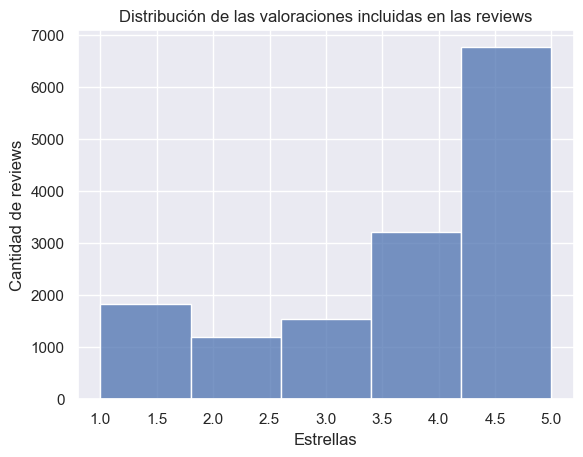

In [4]:
sns.histplot(data = yelp_latin_reviews, x = "stars", stat="count", bins = 5)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Estrellas')
plt.title('Distribución de las valoraciones incluidas en las reviews')
plt.show()

Como podemos observar, **casi la mitad de las reviews** fueron **muy positivas**, ya que superan las 4 estrellas.

Por último, exportamos el archivo filtrado en formato parquet:

In [13]:
# Se exporta el archivo con las reviews de restaurantes latinos en formato parquet:
yelp_latin_reviews.to_parquet("yelp_latin_reviews.parquet")